<a href="https://colab.research.google.com/github/gabrieldogithub18/aprendendo_persistencia_em_flutter/blob/main/modulo_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install keras

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris

In [ ]:
dados = load_iris()
x = pd.DataFrame(dados.data, columns= dados.feature_names)
y = pd.Series(dados.target)

In [ ]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
# para problemas de classição percebemos que é importante que haja um neurônio para cada classe, como vimos no exemplo com os números, logo três neurônios 
y.value_counts()

2    50
1    50
0    50
dtype: int64

In [ ]:
# para isso aplicamos o onehotenconder

In [ ]:
y = pd.get_dummies(y)

In [ ]:
# porém o keras já possui essa função para nos

In [ ]:
import keras
from keras.utils import np_utils

y = np_utils.to_categorical(y)

In [ ]:
y

In [ ]:
np_utils.to_categorical(y= [0,1,1,2,3], num_classes= 4) # to_categorical retorna um np.array de duas dimensões com quantas classes (num_classes) forem definidas
# então ele sinaliza com o número 1 quando aquela amostra (linha) pertencer aquela coluna, isso vem na ordem, o primeiro é o 0 então na primeira amostra
# a coluna 0 tem o 1 e o resto 0, o terceiro número é 1 então a terceira amostra tem o 1 na coluna 1, a quinta amostra tem o 3 então a quinta amostra tem o 1 na coluna 3 

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

xo,xf,yo,yf = train_test_split(x,y, test_size= 0.3, shuffle = True)

In [ ]:
yf.shape

(45, 3)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD # não sei o porquê não consigo importar direto do keras

In [ ]:
modelo = Sequential() # construimos as camadas (entrada, obscuras e saída) com o Sequential

In [ ]:
# construimos as camadas (entrada, obscuras e saída) com o .add , método do Sequential()
# o primeiro argumento é a própria rede, que no caso é densa, portando usamos o Dense
modelo.add(Dense(10, input_dim= 4, kernel_initializer= 'normal', activation= 'relu' )) # poderiamos usar o sigmoide mas ele não é tão eficiente
# o primeiro argumento do Dense é o número de neurônios que a nossa camada oculta vai ter, no caso eu botei 10, mas poderia botar mais ou menos que isso
# o segundo colocamos o número de neurônios de entrada, essa quantidade deve ser exatamente a de features não target (características), no caso é 4
# no terceiro indicamos como os pesos inicialmente serão determinados, na aula vimos que isso é randomizado, sim de fato, mas tem como escolher como essa randomização ocorre, no caso eu botei 'normal' pois tem alguma coisa a ver com a curva gaussiana
modelo.add(Dense(3, kernel_initializer= 'normal', activation= 'softmax' )) # depois explicamos o softmax
# perceba que eu fiz o modelo, e agora eu estou adicionando as camadas a ele, no primeiro foi a obscura e a de entrada e agora a de saída, coloquei três por haver 3 classes

In [ ]:
otimizador = SGD() # aqui estou colocando um optimizador para facilitar o processamento , já vimos isso na aula, no caso o gradiente descendente estocástico

In [ ]:
# agora falta definir a função de custo, colocar o otimizador, na aula a função de custo foi de (real - ideal), mas há outras, a que vou usar ainda vai ser explicada, mas ela é boa para classificação
modelo.compile(loss= 'categorical_crossentropy', optimizer= otimizador, metrics= ['acc']) # acc é acurácia queremos a maior acurácia como métrica

In [ ]:
yo.shape

(105, 3)

In [ ]:
modelo.fit(xo,yo, epochs= 1000, batch_size= 105, validation_data= (xf,yf), verbose= 1)
# queremos 1000 atualizações (epochs= 1000)
# podemos definir quantas a amostras ele usa para treinar em cada atualização, no caso queremos que ele treine com todas as amostras, no caso com 105 (batch_size= 105)
# o terceiro parâmetro é opcional, ele vai mostrar a acurácia para cada atualização dos pesos com os dados de teste
# o verbose = 1 vai dar todas as informações na tela

In [ ]:
from sklearn.datasets import load_breast_cancer

dados = load_breast_cancer()
x = pd.DataFrame(dados.data, columns= dados.feature_names)
y = pd.Series(dados.target)

In [ ]:
y = keras.utils.np_utils.to_categorical(y)
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
xo,xf,yo,yf = train_test_split(x,y, test_size= 0.3, shuffle= True)

In [ ]:
x.shape

(569, 30)

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(Dense(100, input_dim= 30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(100, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(2, kernel_initializer= 'normal', activation= 'softmax'))

otimizador = SGD()
modelo.compile(loss= 'categorical_crossentropy', optimizer= otimizador, metrics= ['acc'])

In [ ]:
xo.shape

(398, 30)

In [ ]:
modelo.fit(xo,yo, epochs= 1000 ,batch_size= 398, validation_data= (xf,yf), verbose= 1)

In [ ]:
predicoes = modelo.predict(xf)
predicoes # aqui ele está mostrando as probabilidades de cada ser de cada classe, isso porque é o softmax (se fosse um de regressão apareceria outra coisa)

array([[1.96769892e-04, 1.82310283e-01, 8.17492902e-01],
       [3.48263159e-02, 7.14924693e-01, 2.50249028e-01],
       [8.58940780e-02, 7.20828533e-01, 1.93277434e-01],
       [9.75925982e-01, 2.40311120e-02, 4.29064567e-05],
       [2.44675321e-04, 2.14125842e-01, 7.85629451e-01],
       [1.16940234e-02, 6.78000748e-01, 3.10305208e-01],
       [4.96749417e-04, 2.81188160e-01, 7.18315125e-01],
       [1.02910644e-03, 3.31179112e-01, 6.67791784e-01],
       [2.93192128e-03, 4.27957207e-01, 5.69110870e-01],
       [9.81570661e-01, 1.84082780e-02, 2.10598209e-05],
       [7.66911486e-04, 2.56307662e-01, 7.42925346e-01],
       [1.23598264e-03, 3.60548377e-01, 6.38215661e-01],
       [9.49645519e-01, 5.01053371e-02, 2.49147735e-04],
       [9.19688642e-01, 7.97598064e-02, 5.51600300e-04],
       [9.87418112e-04, 3.25884014e-01, 6.73128545e-01],
       [7.84221978e-04, 4.15577918e-01, 5.83637834e-01],
       [2.87271794e-02, 7.27718711e-01, 2.43554085e-01],
       [1.03670172e-02, 5.69630

In [ ]:
# MNIST database é um database cheio de imagens

In [ ]:
import keras
from keras.datasets import mnist

(xo,yo), (xf,yf) = mnist.load_data() # dividindo em treino e teste

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
yo.shape

(60000,)

In [ ]:
import pandas as pd
hum = yo
hum = pd.Series(hum)
sorted(hum.value_counts().keys()) # perceba que temos 10 classes, portanto precisamos usar o onehotencoder para cada que cada feature-target tenha seu neurônio respectivo 

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
from keras.utils import np_utils
yo = np_utils.to_categorical(yo)
yf = np_utils.to_categorical(yf)

In [ ]:
yf

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

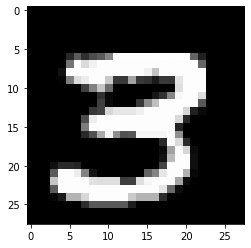

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xo[111], cmap= 'gray') # estou vendo as imagens

In [ ]:
xo[111]  # isso indica o brilho do pixel, vamos normalizar depois com o MinMaxScaler para entre 0 e 1

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
xo.shape # ou seja, 60000 imagens as quais cada uma tem 28 pixels por 28 pixels

(60000, 28, 28)

In [ ]:
28 * 28

784

In [ ]:
xf.shape

(10000, 28, 28)

In [ ]:
xo_bidimensional = xo.reshape((60000, 784)) # o que ele vai fazer é pegar cada imagem e ordenar não em 28 * 28 mas por 784 * 1 (ou 1 * 784, não faz diferença)
xf_bidimensional = xf.reshape((10000, 784))

In [ ]:
xo_bidimensional[0] / 255

In [ ]:
xo_bidimensional_rescaloando = xo_bidimensional.astype('float32') / 255
xf_bidimensional_rescaloando = xf_bidimensional.astype('float32') / 255

In [ ]:
xo_bidimensional_rescaloando[0]

In [ ]:
modelo = Sequential()
modelo.add(Dense(30, input_dim= 784, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(10, kernel_initializer= 'normal', activation= 'softmax'))

In [ ]:
otimizador = SGD()

In [ ]:
modelo.compile(loss= 'categorical_crossentropy', optimizer= otimizador, metrics= ['acc'])

In [ ]:
historico = modelo.fit(xo_bidimensional_rescaloando,yo, epochs= 40, batch_size= 100, validation_data= (xf_bidimensional_rescaloando,yf), verbose= 1)

Epoch 1/40
600/600 [==============================] - 2s 3ms/step - loss: 2.2897 - acc: 0.2204 - val_loss: 2.2668 - val_acc: 0.3547
Epoch 2/40
600/600 [==============================] - 1s 2ms/step - loss: 2.1192 - acc: 0.4107 - val_loss: 1.7576 - val_acc: 0.4784
Epoch 3/40
600/600 [==============================] - 1s 2ms/step - loss: 1.2053 - acc: 0.6586 - val_loss: 0.8200 - val_acc: 0.7558
Epoch 4/40
600/600 [==============================] - 1s 2ms/step - loss: 0.7128 - acc: 0.7855 - val_loss: 0.6210 - val_acc: 0.8139
Epoch 5/40
600/600 [==============================] - 1s 2ms/step - loss: 0.5765 - acc: 0.8304 - val_loss: 0.5203 - val_acc: 0.8441
Epoch 6/40
600/600 [==============================] - 2s 3ms/step - loss: 0.4971 - acc: 0.8566 - val_loss: 0.4578 - val_acc: 0.8655
Epoch 7/40
600/600 [==============================] - 2s 3ms/step - loss: 0.4468 - acc: 0.8719 - val_loss: 0.4189 - val_acc: 0.8783
Epoch 8/40
600/600 [==============================] - 2s 3ms/step - loss: 0.

In [ ]:
historico

In [ ]:
# para poder extrair informações do historico
historico.history['val_acc']

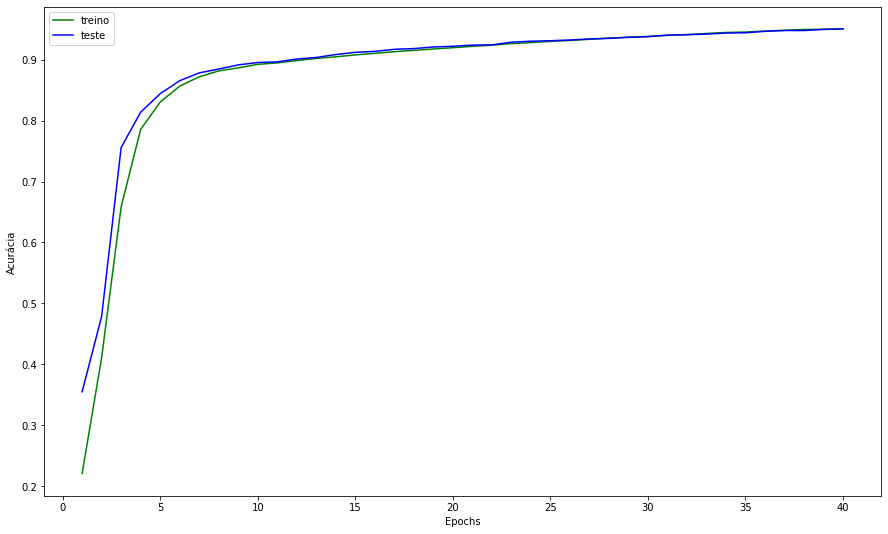

In [ ]:
import matplotlib.pyplot as plt

acuracia_treino = historico.history['acc'] 
acuracia_teste = historico.history['val_acc']

epochs = range(1, len(acuracia_treino) + 1) # quantos epochs ocorreram

plt.figure(figsize= (15,9))
plt.plot(epochs , acuracia_treino, '-g', label= 'treino' )
plt.plot(epochs , acuracia_teste, '-b', label= 'teste')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Acurácia')
plt.show()

In [ ]:
from keras.datasets import mnist
import keras

In [ ]:
(xo,yo), (xf,yf) = mnist.load_data()

In [ ]:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',

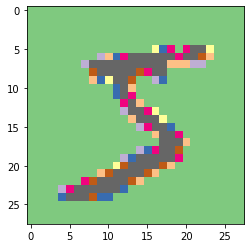

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xo[0], cmap= 'Accent')

In [ ]:
import pandas as pd

In [ ]:
from keras.utils import np_utils

In [ ]:
yo = np_utils.to_categorical(yo)
yf = np_utils.to_categorical(yf)

In [ ]:
xo.shape

(60000, 28, 28)

In [ ]:
xf.shape

(10000, 28, 28)

In [ ]:
28 * 28

784

In [ ]:
xo_rescalonado = xo.reshape(60000,784)
xf_rescalonado = xf.reshape(10000,784)

In [ ]:
xo_rescalonado = xo_rescalonado / 255
xf_rescalonado = xf_rescalonado / 255

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

In [ ]:
modelo = Sequential()

In [ ]:
from keras import activations
modelo.add(Dense(30, input_dim= 784, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(10, kernel_initializer= 'normal', activation= 'softmax'))
otimizador = SGD()
modelo.compile(loss= 'categorical_crossentropy', optimizer= otimizador, metrics= ['acc'])

In [ ]:
modelo.fit(xo_rescalonado,yo, batch_size= 100, epochs= 100, validation_data= (xf_rescalonado,yf), verbose= 1)

Epoch 1/100
600/600 [==============================] - 3s 3ms/step - loss: 2.2924 - acc: 0.1928 - val_loss: 2.2724 - val_acc: 0.2682
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 2.1639 - acc: 0.3783 - val_loss: 1.9089 - val_acc: 0.4637
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 1.3934 - acc: 0.6151 - val_loss: 0.9444 - val_acc: 0.7153
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.7809 - acc: 0.7634 - val_loss: 0.6520 - val_acc: 0.8053
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5948 - acc: 0.8217 - val_loss: 0.5238 - val_acc: 0.8471
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.5000 - acc: 0.8538 - val_loss: 0.4534 - val_acc: 0.8671
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4451 - acc: 0.8708 - val_loss: 0.4133 - val_acc: 0.8784
Epoch 8/100
600/600 [==============================] - 1s 2ms/step - 

In [ ]:
from keras.datasets import mnist
(xo,yo), (xf,yf) = mnist.load_data()

In [ ]:
xo.shape

(60000, 28, 28)

In [ ]:
yo[1]

0

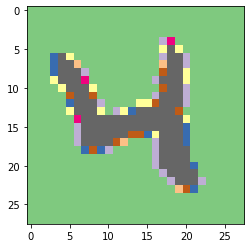

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(xo[20], cmap= 'Accent')

In [ ]:
from keras.utils import np_utils

In [ ]:
np_utils.to_categorical([2,4], num_classes= 5)

array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
xo_bidimensional = xo.reshape(60000,784)
xf_bidimensional = xf.reshape(10000,784)
yo_bidimensional = np_utils.to_categorical(yo)
yf_bidimensional = np_utils.to_categorical(yf)

In [ ]:
xo_rescalonado = xo_bidimensional.astype('float32') / 255
xf_rescalonado = xf_bidimensional.astype('float32') / 255

In [ ]:
from keras.layers import Dense, Activation
from keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Nadam, Adadelta, Adam, Adagrad, Adamax

In [ ]:
modelo = Sequential()

In [ ]:
from keras.layers.core import Dropout
from keras import regularizers
modelo.add(Dense(30, input_dim= 784, kernel_initializer= 'normal', activation= 'relu'))# kernel_regularizer= regularizers.l2(0.02), é assim que botamos regularização
# para dar dropout fazemos entre uma camada e outra (essa dá dropout na camada da linha anterior):
modelo.add(Dropout(0.2))
modelo.add(Dense(30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(10, kernel_initializer= 'normal', activation= 'softmax'))

In [ ]:
otimizador = RMSprop(momentum= 0.9)
modelo.compile(loss= 'categorical_crossentropy', optimizer= otimizador, metrics= ['acc'])

In [ ]:
historico = modelo.fit(xo_rescalonado, yo_bidimensional, batch_size= 200, epochs= 10, validation_data= (xf_rescalonado ,yf_bidimensional), verbose= 1)

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 0.5505 - acc: 0.8253 - val_loss: 0.2290 - val_acc: 0.9329
Epoch 2/10
300/300 [==============================] - 1s 5ms/step - loss: 0.3267 - acc: 0.9058 - val_loss: 0.1745 - val_acc: 0.9482
Epoch 3/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2920 - acc: 0.9139 - val_loss: 0.1720 - val_acc: 0.9481
Epoch 4/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2792 - acc: 0.9194 - val_loss: 0.1707 - val_acc: 0.9527
Epoch 5/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2668 - acc: 0.9221 - val_loss: 0.1498 - val_acc: 0.9558
Epoch 6/10
300/300 [==============================] - 1s 5ms/step - loss: 0.2631 - acc: 0.9226 - val_loss: 0.1596 - val_acc: 0.9574
Epoch 7/10
300/300 [==============================] - 1s 4ms/step - loss: 0.2568 - acc: 0.9264 - val_loss: 0.1586 - val_acc: 0.9546
Epoch 8/10
300/300 [==============================] - 1s 4ms/step - loss: 0.

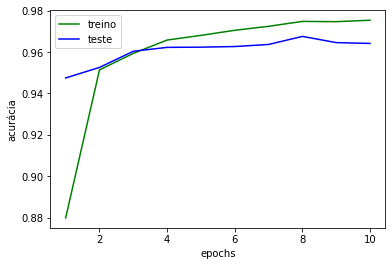

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

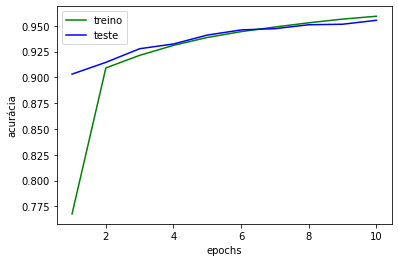

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

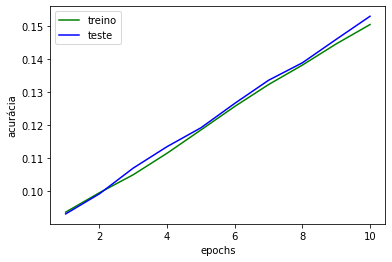

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

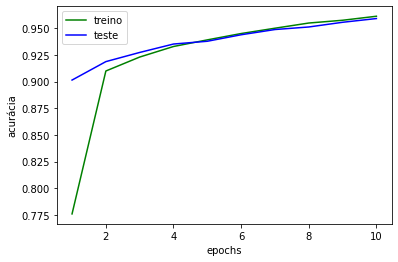

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

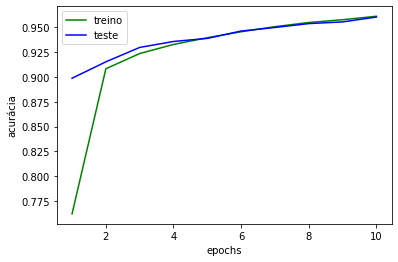

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

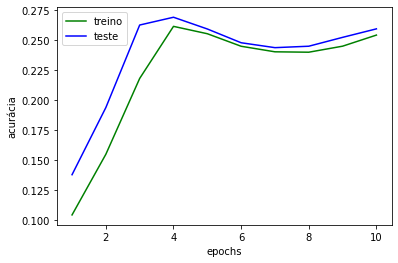

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

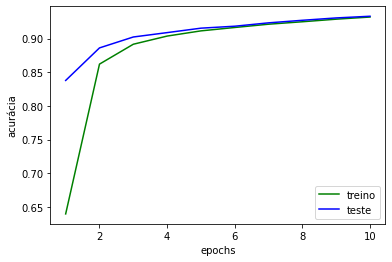

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

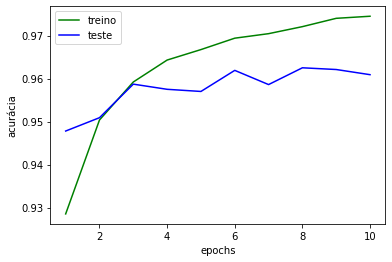

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

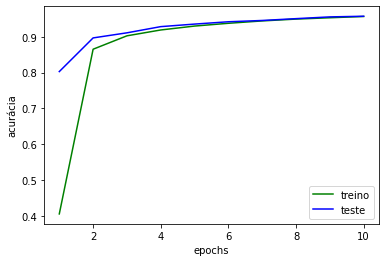

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

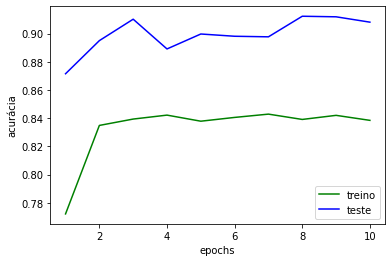

In [ ]:
treino_acc = historico.history['acc']
teste_acc = historico.history['val_acc']

epochs = range(1, len(treino_acc) + 1)

plt.plot(epochs ,treino_acc, '-g', label= 'treino')
plt.plot(epochs ,teste_acc, 'b', label= 'teste' )
plt.legend()
plt.xlabel('epochs')
plt.ylabel('acurácia')
plt.show()

In [ ]:
import pandas as pd

In [ ]:
dados = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/balance-scale/balance-scale.data')
dados.rename(columns= {'B':'class_name', '1':'Left-Weight', '1.1':'Left-Distance', '1.2':'Right-Weight', '1.3':'Right-Distance'}, inplace= True)

In [ ]:
dados

,class_name,Left-Weight,Left-Distance,Right-Weight,Right-Distance
0,R,1,1,1,2
1,R,1,1,1,3
2,R,1,1,1,4
3,R,1,1,1,5
4,R,1,1,2,1
...,...,...,...,...,...
619,L,5,5,5,1
620,L,5,5,5,2
621,L,5,5,5,3
622,L,5,5,5,4


In [ ]:
y = dados['class_name']
x = dados.drop(columns= ['class_name'])

In [ ]:
y.value_counts().keys()

Index(['L', 'R', 'B'], dtype='object')

In [ ]:
y = y.map({'L':0,'R':1,'B':2})

In [ ]:
y = np_utils.to_categorical(y)

In [ ]:
y

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split

xo,xf,yo,yf = train_test_split(x,y, stratify= y)

In [ ]:
'''
SGD()
SGD(nesterov= True)
SGD(momentum= 0.9, nesterov= True)

RMSprop()
RMSprop(momentum= 0.9)
RMSprop(momentum= 0.9, centered= True)

Adam()
Adam(amsgard= True)

Adamax()
Nadam()
Adagrad()
'''

'\nSGD()\nSGD(nesterov= True)\nSGD(momentum= 0.9, nesterov= True)\n\nRMSprop()\nRMSprop(momentum= 0.9)\nRMSprop(momentum= 0.9, centered= True)\n\nAdam()\nAdam(amsgard= True)\n\nAdamax()\nNadam()\nAdagrad()\n'

In [ ]:
modelo = Sequential()
modelo.add(Dense(30, input_dim= 4, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(3, kernel_initializer= 'normal', activation= 'softmax'))
otimizador = RMSprop(momentum= 0.9, centered= True)
modelo.compile(loss= 'categorical_crossentropy', optimizer= otimizador, metrics= ['acc'])

In [ ]:
historico = modelo.fit(xo,yo, batch_size= 468, epochs= 600, validation_data= (xf,yf), verbose= 1 )

Epoch 1/600
1/1 [==============================] - 1s 853ms/step - loss: 1.0998 - acc: 0.1132 - val_loss: 1.0964 - val_acc: 0.4679
Epoch 2/600
1/1 [==============================] - 0s 28ms/step - loss: 1.0964 - acc: 0.5171 - val_loss: 1.0913 - val_acc: 0.4615
Epoch 3/600
1/1 [==============================] - 0s 25ms/step - loss: 1.0914 - acc: 0.4915 - val_loss: 1.0844 - val_acc: 0.4615
Epoch 4/600
1/1 [==============================] - 0s 26ms/step - loss: 1.0844 - acc: 0.4765 - val_loss: 1.0745 - val_acc: 0.4615
Epoch 5/600
1/1 [==============================] - 0s 26ms/step - loss: 1.0740 - acc: 0.5235 - val_loss: 1.0594 - val_acc: 0.4615
Epoch 6/600
1/1 [==============================] - 0s 27ms/step - loss: 1.0587 - acc: 0.5128 - val_loss: 1.0357 - val_acc: 0.4615
Epoch 7/600
1/1 [==============================] - 0s 28ms/step - loss: 1.0348 - acc: 0.4957 - val_loss: 0.9988 - val_acc: 0.4615
Epoch 8/600
1/1 [==============================] - 0s 31ms/step - loss: 0.9988 - acc: 0.4

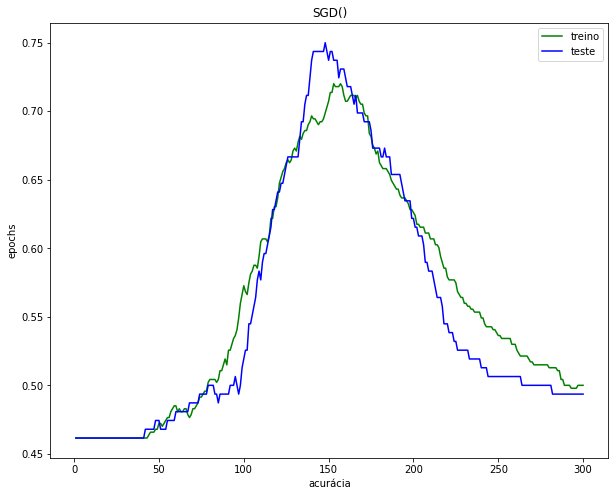

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('SGD()')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

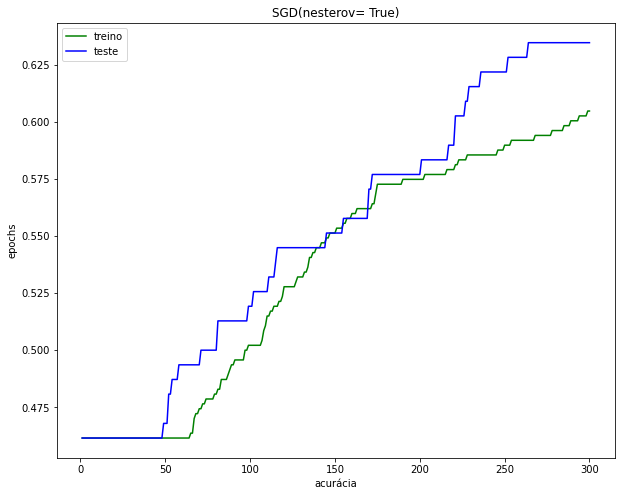

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('SGD(nesterov= True)')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

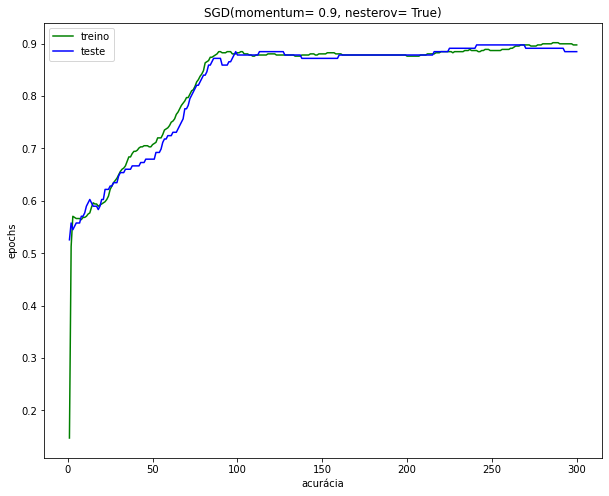

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('SGD(momentum= 0.9, nesterov= True)')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

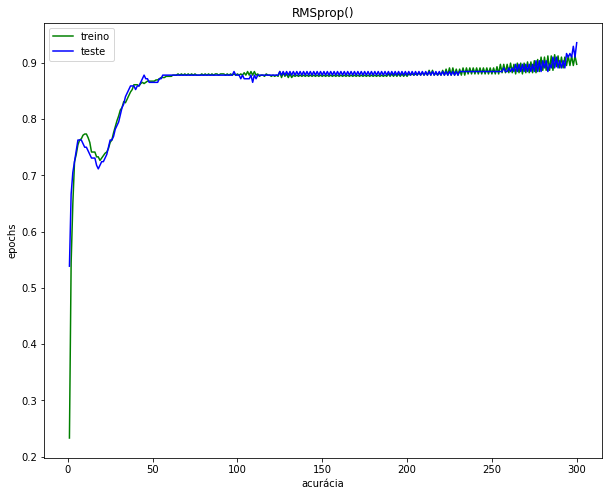

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('RMSprop()')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

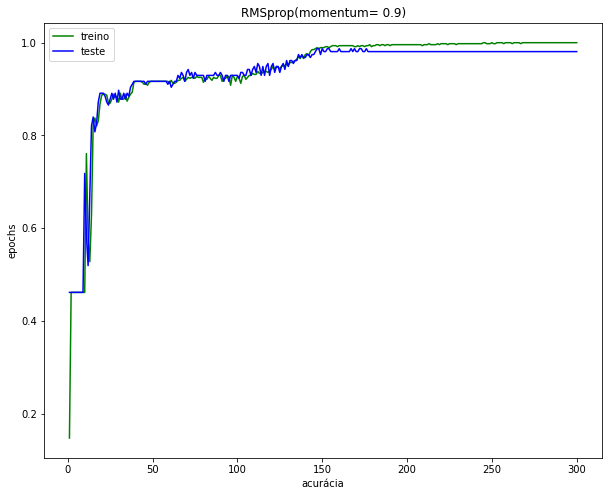

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('RMSprop(momentum= 0.9)')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

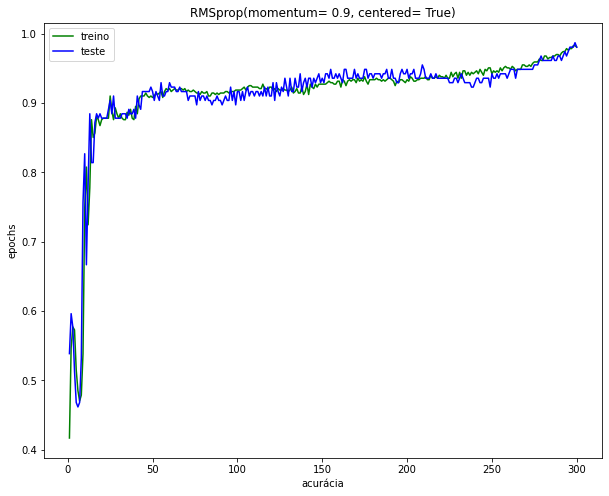

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('RMSprop(momentum= 0.9, centered= True)')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

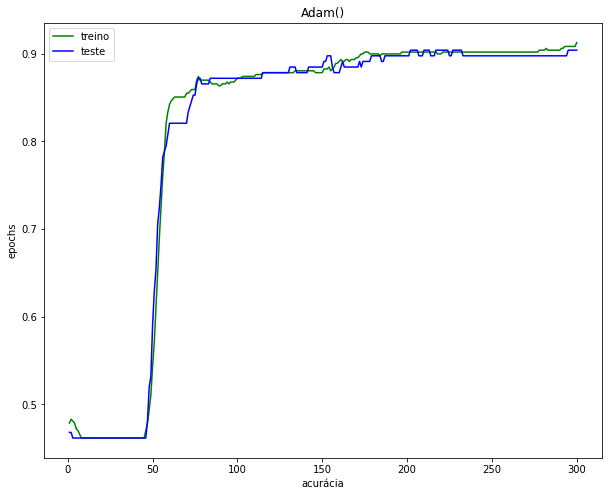

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('Adam()')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

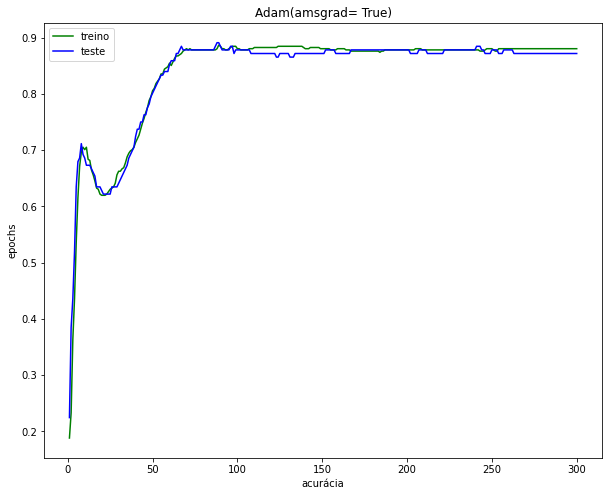

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('Adam(amsgrad= True)')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

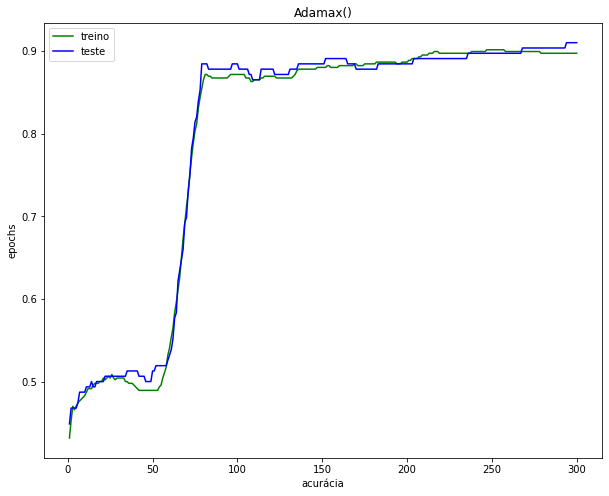

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('Adamax()')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

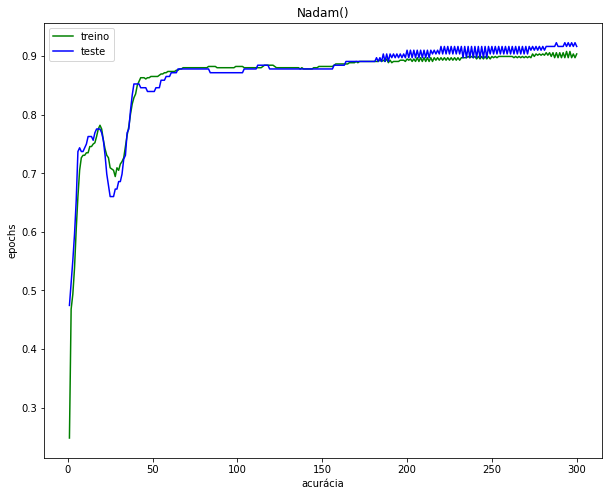

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('Nadam()')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

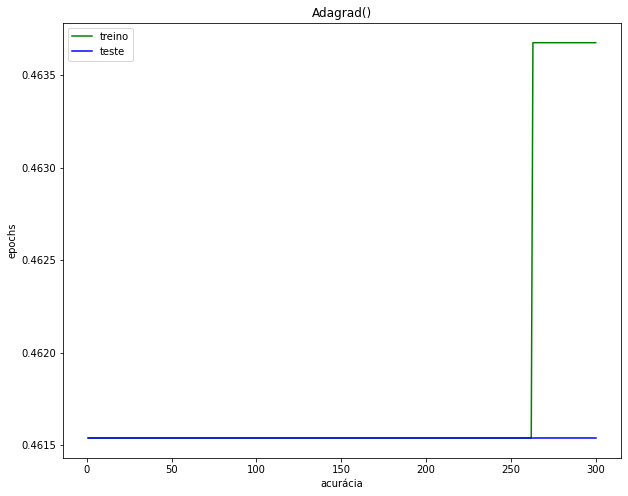

In [ ]:
treino = historico.history['acc']
teste = historico.history['val_acc']

epochs = range(1, len(treino) + 1)

plt.figure(figsize= (10,8))
plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('Adagrad()')
plt.xlabel('acurácia')
plt.ylabel('epochs')
plt.show()

In [ ]:
from sklearn.datasets import load_boston
import pandas as pd

dados = load_boston()
x = pd.DataFrame(dados.data, columns= dados.feature_names)
y = pd.Series(dados.target)

In [ ]:
from sklearn.model_selection import train_test_split

xo,xf,yo,yf = train_test_split(x,y)

In [ ]:
xo.shape

(379, 13)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adamax, Adagrad, Adadelta

In [ ]:
modelo = Sequential()
modelo.add(Dense(30, input_dim= 13, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(30, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(1, kernel_initializer= 'normal', activation= 'linear'))

otimizador = RMSprop()

In [ ]:
modelo.compile(loss= 'mean_squared_error', optimizer= otimizador, metrics= ['mae'])

In [ ]:
historico = modelo.fit(xo,yo, batch_size= 379, epochs= 1000, validation_data= (xf,yf), verbose= 1)

Epoch 1/1000
1/1 [==============================] - 1s 583ms/step - loss: 578.9524 - mae: 22.0009 - val_loss: 447.2526 - val_mae: 19.4924
Epoch 2/1000
1/1 [==============================] - 0s 19ms/step - loss: 517.5810 - mae: 20.5252 - val_loss: 407.3347 - val_mae: 18.4352
Epoch 3/1000
1/1 [==============================] - 0s 21ms/step - loss: 475.0318 - mae: 19.4553 - val_loss: 369.8446 - val_mae: 17.4000
Epoch 4/1000
1/1 [==============================] - 0s 19ms/step - loss: 435.3555 - mae: 18.4078 - val_loss: 332.8952 - val_mae: 16.3096
Epoch 5/1000
1/1 [==============================] - 0s 20ms/step - loss: 395.8921 - mae: 17.3012 - val_loss: 297.4792 - val_mae: 15.1795
Epoch 6/1000
1/1 [==============================] - 0s 22ms/step - loss: 358.0712 - mae: 16.1932 - val_loss: 264.4883 - val_mae: 14.0609
Epoch 7/1000
1/1 [==============================] - 0s 26ms/step - loss: 322.6949 - mae: 15.1071 - val_loss: 233.9449 - val_mae: 12.9618
Epoch 8/1000
1/1 [======================

In [ ]:
historico.history['mae']

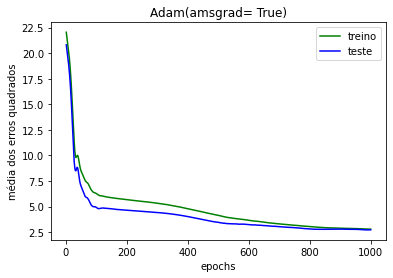

In [ ]:
import matplotlib.pyplot as plt

treino = historico.history['mae']
teste = historico.history['val_mae']

epochs = range(1, len(treino) + 1)

plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('Adam(amsgrad= True)')
plt.xlabel('epochs')
plt.ylabel('média dos erros quadrados')
plt.show()

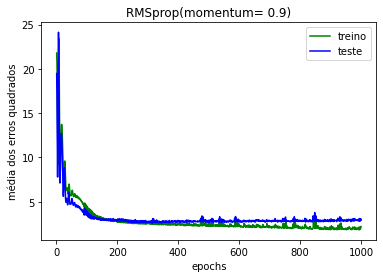

In [ ]:
import matplotlib.pyplot as plt

treino = historico.history['mae']
teste = historico.history['val_mae']

epochs = range(1, len(treino) + 1)

plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('RMSprop(momentum= 0.9)')
plt.xlabel('epochs')
plt.ylabel('média dos erros quadrados')
plt.show()

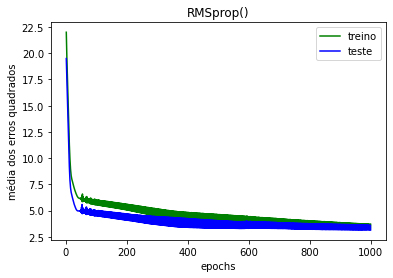

In [ ]:
import matplotlib.pyplot as plt

treino = historico.history['mae']
teste = historico.history['val_mae']

epochs = range(1, len(treino) + 1)

plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.title('RMSprop()')
plt.xlabel('epochs')
plt.ylabel('média dos erros quadrados')
plt.show()

In [ ]:
import pandas as pd
dados = pd.read_csv('Admission_Predict.csv')

In [ ]:
dados

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
dados.isna().sum()[dados.isna().sum() > 0]

Series([], dtype: int64)

In [ ]:
dados.drop(columns= ['Serial No.','University Rating'], inplace= True)

In [ ]:
dados.columns

Index(['GRE Score', 'TOEFL Score', 'SOP', 'LOR ', 'CGPA', 'Research',
       'Chance of Admit '],
      dtype='object')

In [ ]:
x = dados.drop(columns= ['Chance of Admit '])
y = dados['Chance of Admit ']

xo,xf,yo,yf = train_test_split(x,y)

In [ ]:
xo.shape

(300, 6)

In [ ]:
modelo = Sequential()

In [ ]:
modelo.add(Dense(20, input_dim= 6, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(20, kernel_initializer= 'normal', activation= 'relu'))
modelo.add(Dense(1, kernel_initializer= 'normal', activation= 'linear'))

otimizador = Adam(amsgrad= True)

modelo.compile(loss= 'mean_squared_error', optimizer= otimizador, metrics= ['mae'])

In [ ]:
historico = modelo.fit(xo,yo, batch_size= 300, epochs= 1000, validation_data= (xf,yf), verbose= 1 )

Epoch 1/1000
1/1 [==============================] - 0s 41ms/step - loss: 0.0122 - mae: 0.0865 - val_loss: 0.0123 - val_mae: 0.0893
Epoch 2/1000
1/1 [==============================] - 0s 38ms/step - loss: 0.0122 - mae: 0.0864 - val_loss: 0.0123 - val_mae: 0.0893
Epoch 3/1000
1/1 [==============================] - 0s 31ms/step - loss: 0.0121 - mae: 0.0864 - val_loss: 0.0123 - val_mae: 0.0892
Epoch 4/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0121 - mae: 0.0863 - val_loss: 0.0123 - val_mae: 0.0892
Epoch 5/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0121 - mae: 0.0863 - val_loss: 0.0123 - val_mae: 0.0892
Epoch 6/1000
1/1 [==============================] - 0s 30ms/step - loss: 0.0121 - mae: 0.0863 - val_loss: 0.0122 - val_mae: 0.0891
Epoch 7/1000
1/1 [==============================] - 0s 57ms/step - loss: 0.0121 - mae: 0.0862 - val_loss: 0.0122 - val_mae: 0.0891
Epoch 8/1000
1/1 [==============================] - 0s 34ms/step - loss: 0.0121 - m

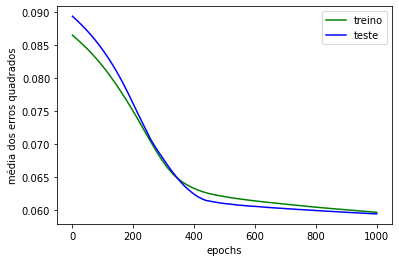

In [ ]:
treino = historico.history['mae']
teste = historico.history['val_mae']

epochs = range(1, len(treino) + 1)

plt.plot(epochs, treino, '-g', label= 'treino')
plt.plot(epochs, teste, '-b', label= 'teste')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('média dos erros quadrados')
plt.show()

In [ ]:
pip install tensorflow==2.6.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.constant('olá mundo')

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
frase = tf.constant('Ola, mundo !')

In [ ]:
with tf.compat.v1.Session() as sess: # assim eu consigo chamar uma função de maneira simplificada
  x = sess.run(frase)
print(x)

b'Ola, mundo !'


In [ ]:
# b'Ola, mundo !' # esse b não significa nada, se quiser tirar faz-se:
with tf.compat.v1.Session() as sess:
  y = sess.run(frase).decode('UTF-8')
print(y) # o '.decode(UTF-8)' pode ser colocado na variável que receb também, claro

Ola, mundo !


In [ ]:
print(tf.compat.v1.Session().run(tf.constant('olá mundo')).decode('UTF-8')) # resumido o que fizemos

olá mundo


In [ ]:
tf.constant('olá mundo') # o tensorflow só imprime o resultado se eu pedir para a sessão rodar, , se não ele mostra o tensor

<tf.Tensor 'Const_6:0' shape=() dtype=string>

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
a = tf.constant(5)
b = tf.constant(3)
c = tf.constant(2)

d = tf.multiply(a,b)
e = tf.add(b,c)
f = tf.subtract(d,e)

sess = tf.compat.v1.Session()
saida = sess.run(f)
sess.close() # isso aqui é para a seção fechar, é bom que você faça isso pois os valores continuam guardados porém quando você fecha a seção os recursos computacionais são liberados

In [ ]:
print(saida)

10


In [ ]:
f

<tf.Tensor 'Sub_1:0' shape=() dtype=int32>

In [ ]:
n = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(n)
  x = n * n
hum = tf.gradients(x,n)
print(hum)

[<tf.Tensor 'gradients/AddN:0' shape=() dtype=float32>]


In [ ]:
n = tf.constant(3.0)
with tf.GradientTape() as g:
  g.watch(n)
  y = n * n
hum = g.gradient(y,n)
print(hum)

Tensor("AddN_13:0", shape=(), dtype=float32)


In [ ]:
tf.GradientTape()

In [ ]:
x = tf.Variable(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x
dy_dx = g.gradient(y, x)
print(dy_dx)

Tensor("AddN_12:0", shape=(), dtype=float32)


In [ ]:
pip install tensorflow==2.6.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
a = tf.constant(2)                             # tensor de dimensão 0    # 0 x 0  # 1x1
b = tf.constant([5,9,1,2,3])                   # tensor de dimensão 1    # 5 x 0  # lxn
c = tf.constant([[3,4,5],[9,6,7]])             # tensor de dimensão 2    # 3 x 3  # lxl

# a é um tensor 0-dimensional (escalar), b é um tensor 1-dimensional (vetor), c é um tensor 2-dimensional (matriz)

In [ ]:
sess = tf.compat.v1.Session()
saida = sess.run(c)
sess.close()

In [ ]:
# posso especificar o tipo de tensor

const = tf.constant(300000, dtype= tf.int16)
const

<tf.Tensor 'Const_12:0' shape=() dtype=int16>

In [ ]:
a = tf.constant([[16,5,9], [3,6,9]])  # 2 x 3
b = tf.constant([[5],[18],[1]])       # 3 x 1

print(a.shape, b.shape)

(2, 3) (3, 1)


In [ ]:
sess = tf.compat.v1.Session()
hum_b = sess.run(b)
sess.close()

In [ ]:
hum

array([[16,  5,  9],
       [ 3,  6,  9]], dtype=int32)

In [ ]:
hum_b

array([[ 5],
       [18],
       [ 1]], dtype=int32)

In [ ]:
resultado = tf.matmul(a,b) # multiplica as matrizes

In [ ]:
sess = tf.compat.v1.Session()
sess.run(resultado)

array([[179],
       [132]], dtype=int32)

In [ ]:
e = tf.constant([1,5,4,7,2,1,3,8,8,10,17,5,6]) 

In [ ]:
e # assim temos um vetor ou matriz 1 x 13

<tf.Tensor 'Const_19:0' shape=(13,) dtype=int32>

In [ ]:
e_expandido = tf.expand_dims(e, -1) # mas com expand_dims() posso expandir as dimensões desse vetor , no caso eu expandi para a vertical (1 ou -2), para a horizonatl faço -1 ou 0

In [ ]:
e_expandido

<tf.Tensor 'ExpandDims_5:0' shape=(13, 1) dtype=int32>

In [ ]:
sess.run(e_expandido)

array([[ 1],
       [ 5],
       [ 4],
       [ 7],
       [ 2],
       [ 1],
       [ 3],
       [ 8],
       [ 8],
       [10],
       [17],
       [ 5],
       [ 6]], dtype=int32)

In [ ]:
f = tf.constant([[2,5,6],[19,15,12]])


In [ ]:
sess.run(f)

array([[ 2,  5,  6],
       [19, 15, 12]], dtype=int32)

In [ ]:
f_expandido_1 = tf.expand_dims(f, 1)
f_expandido_0 = tf.expand_dims(f, 0)

In [ ]:
sess.run(f_expandido_0)

array([[[ 2,  5,  6],
        [19, 15, 12]]], dtype=int32)

In [ ]:
f_expandido_0.shape # é 1 matriz de 2 x 3 

TensorShape([1, 2, 3])

In [ ]:
sess.run(f_expandido_1)

array([[[ 2,  5,  6]],

       [[19, 15, 12]]], dtype=int32)

In [ ]:
f_expandido_1.shape # são 2 matrizes de 1 x 3 cada

TensorShape([2, 1, 3])

In [ ]:
sess.run(a)

array([[16,  5,  9],
       [ 3,  6,  9]], dtype=int32)

In [ ]:
a_transposta = tf.transpose(a) # posso fazer transpostas
sess.run(a_transposta)

array([[16,  3],
       [ 5,  6],
       [ 9,  9]], dtype=int32)

In [ ]:
sess.run(tf.transpose(f_expandido_1)) # 3 matrizes de 1 x 2 cada

array([[[ 2, 19]],

       [[ 5, 15]],

       [[ 6, 12]]], dtype=int32)

In [ ]:
tf.transpose(f_expandido_1).shape

TensorShape([3, 1, 2])

In [ ]:
sess.run(tf.transpose(f_expandido_0)) # 3 matrizes de 2 x 1 cada

array([[[ 2],
        [19]],

       [[ 5],
        [15]],

       [[ 6],
        [12]]], dtype=int32)

In [ ]:
variavel = tf.Variable(2) # vamos aprender a fazer um tensor com valores variável, que possa ser atualizado

In [ ]:
# por que deu erro ?, os tensores do tipo variable precisam ser inicializador antes de poderem rodar, para o tensorflow poder usar uma variável, eu preciso 
# já ter reservado uma memória para ela
sess.run(variavel)

In [ ]:
# e como inicializa ?
init = tf.compat.v1.global_variables_initializer()
sess.run(init)                                      # depois que ele roda esse init das variáveis, pronto, pode usar as variáveis

saida = sess.run(variavel)
print(saida)

2


In [ ]:
# podemos fazer alguma coisa que não é variável em uma variável

matriz = tf.random.normal( (2,5),  0, 1 ) 
# tf.random cria matrizes com valores randomicos, no caso estamos tirando valores randomicos de uma curva de distribuição normal, seus parâmetros são (shape, média, desvio padrão)

In [ ]:
 matriz

<tf.Tensor 'random_normal:0' shape=(2, 5) dtype=float32>

In [ ]:
var = tf.Variable(matriz)

In [ ]:
var

<tf.Variable 'Variable_4:0' shape=(2, 5) dtype=float32>

In [ ]:
sess = tf.compat.v1.Session()
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

In [ ]:
x = sess.run(var)

In [ ]:
a = tf.constant([[2,1,18],[8,9,10]])
b = tf.constant([[10],[1],[23]])
mult = tf.matmul(a,b)
sess.run(mult)

array([[435],
       [319]], dtype=int32)

In [ ]:
sess.run(tf.transpose(a))

array([[ 2,  8],
       [ 1,  9],
       [18, 10]], dtype=int32)

In [ ]:
c = tf.constant([1,2,3,4,5,6,7,8,9,10])
sess.run(tf.expand_dims(c, axis =1))

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int32)

In [ ]:
c = tf.constant([[1,2,3,4,5],[6,7,8,9,10]])
c_expandido_vertical = tf.expand_dims(c, axis =1)
sess.run(tf.transpose(c_expandido_vertical))

array([[[ 1,  6]],

       [[ 2,  7]],

       [[ 3,  8]],

       [[ 4,  9]],

       [[ 5, 10]]], dtype=int32)

In [ ]:
sess.run(c)

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int32)

In [ ]:
c.shape

TensorShape([2, 5])

In [ ]:
sess.run(c_expandido_vertical)

array([[[ 1,  2,  3,  4,  5]],

       [[ 6,  7,  8,  9, 10]]], dtype=int32)

In [ ]:
c_expandido_vertical.shape

TensorShape([2, 1, 5])

In [ ]:
sess.run(tf.transpose(c_expandido_vertical))

array([[[ 1,  6]],

       [[ 2,  7]],

       [[ 3,  8]],

       [[ 4,  9]],

       [[ 5, 10]]], dtype=int32)

In [ ]:
tf.transpose(c_expandido_vertical).shape

TensorShape([5, 1, 2])

In [ ]:
c_e_v_transposto = tf.transpose(c_expandido_vertical)

In [ ]:
# placehold 

In [ ]:
# placehold seria espaços reservados, ou seja variáveis vazias que serão preenchidas depois

In [ ]:
pip install tensorflow==2.6.0

In [ ]:
import tensorflow as tf
tf.compat.v1.disable_eager_execution()

In [ ]:
sess = tf.compat.v1.Session()
a = tf.constant(10)
sess.run(a)

10

In [ ]:
x = tf.random.normal((3,3), mean= 2, stddev= 1)
sess.run(x)

array([[3.3540487, 0.7675092, 3.2598636],
       [2.6456914, 1.9004891, 3.658064 ],
       [2.2494392, 1.5386784, 2.4640102]], dtype=float32)

In [ ]:
import numpy as np

dados_x = np.random.randn(4,8)
dados_x

array([[ 1.21001161, -0.17181637, -0.98370415, -0.27886244, -0.1329923 ,
        -0.87867577,  0.99427555, -0.82075567],
       [ 0.20712326,  1.68110763,  0.3034929 ,  1.3021895 ,  1.56531178,
         0.41766058,  0.16017968,  1.28760018],
       [ 1.11408502, -0.76580797,  1.10045729,  0.50162811, -1.26770934,
         1.207977  , -1.00397296,  0.83967371],
       [ 0.11784909,  0.63127841,  0.80103469,  0.52591285, -0.03679613,
         0.43797662, -0.99724206, -0.40038229]])

In [ ]:
import numpy as np

dados_x = np.random.randn(4,8)
dados_w = np.random.randn(8,2)

b = tf.random.normal((4,2), 0, 1)

x = tf.compat.v1.placeholder(tf.float32, shape= (4, 8))     # é intuitivo quando se analisa e se entede o conceito de placeholder
w = tf.compat.v1.placeholder(tf.float32, shape= (8, 2))     # o que ocorre é que estamos reservando dois lugares (2 placeholders) para 2 matrizes  
operacao = tf.matmul(x,w) + b #ou tf.add(tf.matmul(x,w), b) # essas duas matrizes (uma 4x8 outra de 8x2) após recebidas, serão multiplicadas e somadas com uma terceira  
                                                            # PRESTA ATENÇÃO que desde o b até operação só estamos usando tensorflow, b,x e w são os três feitos en tensor (importante) 
maximo = tf.reduce_max(operacao)  # aqui ele vai se intereçar em pegar o maior valor, no caso de uma matriz

saida_1 = sess.run(operacao, feed_dict= {x: dados_x, w: dados_w})    # depois explico, mas não posso passar no feed_dict tensores, deve ser outros tipos de dados, como o numpy
saida_2 = sess.run(maximo  , feed_dict= {x: dados_x, w: dados_w})    # o feed_dict vai prencher os placeholders da operação que voce colocar, e se tiver valores já determinados 
                                                                     # então ele vai colocar como se fosse uma constante, no caso minha operação tem 2 variáveis, x e w, por isso as duas chaves são x e w

In [ ]:
print(saida_1)

[[ 4.2557716  -0.70752525]
 [-0.3884123  -0.49674568]
 [ 1.4121128   0.8696854 ]
 [-1.4512261   3.5339239 ]]


In [ ]:
sess.run(tf.reduce_max(saida_1))

4.2557716

In [ ]:
print(saida_2) # entenda que a saida dois terão seus dados_x e dados_w distintos pois ele vai rodar a operação de novo, interessante isso

2.324671


In [ ]:
# bom agora vimos como funciona esse lance de placeholders, mas agora vamos ver como se faz pacotes, pois na rede neural os placeholders não guardarão valores fixos
# no exemplo passado guardamos valores fixos (x e w) que a cada rodada são randomicos mas só são eles no final, para colocarmos mais variáveis usamos pacotes

In [ ]:
x1 = np.random.randn(4,8)
w1 = np.random.randn(8,2)

x2 = np.random.randn(4,8)
w2 = np.random.randn(8,2)

x3 = np.random.randn(4,8)
w3 = np.random.randn(8,2)

x4 = np.random.randn(1,10)
w4 = np.random.randn(10,5) # seguindo os exemplos do placeholder com None, lembrando que deve-se aprestar atenção aos valores fixos, no caso o b

x5 = np.random.randn(4,8)
w5 = np.random.randn(8,2)

lista_x = [x1,x2,x3,x4,x5]
lista_w = [w1,w2,w3,w4,w5]
lista_saida = []

valor_x = tf.compat.v1.placeholder(tf.float32, shape= (None,None))  # uma coisa legal do placeholder é que não preciso especificar os shapes esperados !, apenas uso None
valow_w = tf.compat.v1.placeholder(tf.float32, shape= (None,None))  # que loucura !, mas lembre-se, isso pode diminuir a peformace pois ele vai ter que procurar saber o shape
                                                                    # de cada dado que entra, já que esses ainda não estão especificados
b = tf.random.normal(shape= (4,2),mean= 0, stddev= 1)

operacao = tf.add(tf.matmul(x,w), b)
maximo = tf.reduce_max(operacao)

for a in range(5):                                                     # acaba que poacotes nada mais que é uma lista de dados de entrada e aplicados com laço de repetição
  matriz = sess.run(maximo, feed_dict= {x: lista_x[a], w: lista_w[a]})
  lista_saida.append(matriz)

print(lista_saida) 

[4.988806, 4.614935, 3.749815, 5.4120407, 0.9277737]


In [ ]:
pip install tensorflow==2.6.0

In [ ]:
import tensorflow as tf

In [ ]:
tf.compat.v1.disable_eager_execution()

In [ ]:
import numpy as np

x = np.random.randn(4,8)
y = np.random.randn(8,2)

valor_x = tf.compat.v1.placeholder(tf.float32, shape= (4,8))
valor_y = tf.compat.v1.placeholder(tf.float32, shape= (8,2))

b = tf.random.normal((4,2), 0, 1)

operacao = tf.matmul(valor_x,valor_y) + b

sess = tf.compat.v1.Session()

resultado = sess.run(operacao, feed_dict= {valor_x: x,valor_y: y})
resultado

array([[ 0.3966682,  3.9900827],
       [ 1.6133963, -5.519037 ],
       [-1.540935 , -1.9133153],
       [-2.7421217, -5.720558 ]], dtype=float32)

In [ ]:
sess.run(tf.reduce_max(resultado))

3.9900827

In [ ]:
a = tf.constant(2, tf.float16, name= 'tensor_a')
b = tf.constant(3, tf.float16, name= 'tensor_b')
c = tf.add(a,b)

writer = tf.compat.v1.summary.FileWriter('C:\\Users\\pituc\\', sess.graph)
saida = sess.run(c)
print(saida)
writer.close()

5.0


In [ ]:
tf.mult

In [ ]:
# didaticatech@gmail.com

In [ ]:
pip install tensorflow==2.6.0

In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Mandatory: to launch 
#tf.enable_eager_execution() 

mnist_data, info = tfds.load("mnist", with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_data["train"], mnist_data


local data directory. If you'd instead prefer to read directly from our public
GCS bucket (recommended if you're running on GCP), you can instead pass
`try_gcs=True` to `tfds.load` or set `data_dir=gs://tfds-data/datasets`.



Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]


Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
batch_size = 200
batch_x = mnist_train.batch(batch_size)

In [9]:
batch_x.

<BatchDataset shapes: ((None, 28, 28, 1), (None,)), types: (tf.uint8, tf.int64)>

In [10]:
mnist = tf.keras.datasets.mnist

In [ ]:
mnist.load_data()

In [11]:
from tensorflow.examples.tutorials.mnist import input_data

ModuleNotFoundError: ignored

In [3]:
train_df = tfds.as_dataframe(mnist_data["train"],info)

In [5]:
train_df

KeyboardInterrupt: ignored

In [6]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

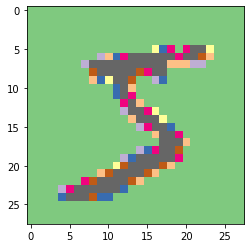

In [7]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap= 'Accent')

In [8]:
from tensorflow.keras.utils import to_categorical
treino_y = to_categorical(train_labels)
teste_y  = to_categorical(test_labels)

In [ ]:
learning_rate = 0.001
epochs = 10
batch_size = 200

In [28]:
!pip install tensorflow==2.6.0

In [29]:
import tensorflow as tf
#tf.compat.v1.enable_eager_execution()
sess = tf.compat.v1.Session()

In [ ]:

tf.enable_eager_execution()

In [4]:
tf.compat.v1.disable_eager_execution()

In [ ]:
tf.compat.v1.enable_eager_execution()

In [3]:
sess = tf.compat.v1.Session()

In [30]:
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

soma = tf.add(a,b)
sub  = tf.subtract(c,a)
multiple = tf.multiply(soma,sub)

saida = sess.run(multiple)
print(saida)

15


In [36]:
tf.compat.v1.enable_eager_execution()

ValueError: ignored

In [31]:
import tensorflow as tf
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [32]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [33]:
treino_y = to_categorical(train_labels)
teste_y  = to_categorical(test_labels)

In [34]:

learning_rate = 0.001
epochs = 10
batch_size = 200

In [35]:
batch_size

200

In [15]:
n_entrada = 784
n_camada_1 = 30
n_camada_2 = 30
n_saida = 10

In [37]:
x = tf.compat.v1.placeholder(tf.float32, shape= (None, n_entrada)) # como a matriz da amostra varia criamos um placeholder
y = tf.compat.v1.placeholder(tf.float32, shape= (None, n_saida))

In [38]:
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

In [39]:
w1 = tf.Variable(tf.random.normal([n_entrada, n_camada_1], stddev= 0.05))

# bias da camada 1
b1 = tf.Variable(tf.zeros([n_camada_1]))

# camada 1
layer_1 = tf.nn.relu(tf.add(tf.matmul(x,w1), b1)) # multiplica pesos e valores e soma com bias e aplica o relu



# pesos da camada 2
w2 = tf.Variable(tf.random.normal([n_camada_1, n_camada_2], stddev= 0.05))

# bias da camada 2
b2 = tf.Variable(tf.zeros([n_camada_2]))

# camada 2
layer_2 = tf.nn.relu(tf.add(tf.matmul(layer_1, w2), b2))




# pesos da camada de saída (output)
w_out = tf.Variable(tf.random.normal([n_camada_2, n_saida], stddev= 0.05))

# bias da camda de saída (output)
bias_out = tf.Variable(tf.zeros([n_saida]))

# camada de saída (output)
saida = tf.matmul(layer_2, w_out) + bias_out

In [40]:
custo = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= saida, labels= y)) # vai ser a softmax que vai rescalonar a saída a fim de colocar em probabilidade, os labels são as target

# otimizador
otimizador = tf.compat.v1.train.AdamOptimizer(learning_rate= learning_rate).minimize(custo) # ou seja quero minimizar a função de custo com o otimizador adam

In [41]:
predicoes = tf.equal(tf.argmax(saida, 1), tf.argmax(y, 1)) # aqui nos vemos se o mesmo neurônio que deveria estar ativado , de acordo com o gabarito, foi ativado pela rede neural
# se estiver correto será 1, se errar será 0

# calculando acurácia
acuracia = tf.reduce_mean(tf.cast(predicoes, tf.float32))

In [42]:
import tensorflow_datasets as tfds



# Mandatory: to launch 
#tf.enable_eager_execution() 

mnist_data, info = tfds.load("mnist", with_info=True, as_supervised=True)
mnist_train, mnist_test = mnist_data["train"], mnist_data

In [43]:
epochs

10

In [46]:
tf.compat.v1.enable_eager_execution()

ValueError: ignored

In [44]:
 # mnist.train.next_batch 
import os
os.environ['DISABLE_COLAB_TF_IMPORT_HOOK'] = '1'
acuracia_teste = 0

for epoch in range(10):
    custo_medio = 0.0
    total_batches = int(info.splits["train"].num_examples/batch_size) # q.de imagens/ q.de imagens desejada em cada batch 
    
    # loop por todas as iterações (batches)
    for i in range(total_batches):
        batch_x, batch_y = mnist_train.batch(batch_size) 
        
        # fit training usando batch data
        sess.run(otimizador, feed_dict= {x: batch_x, y: batch_y})
        
        # computando o custo (loss) de um epoch completo (soma todos os custos de cada batch e divide pelo total de batchs)
        custo_medio = custo_medio + sess.run(custo, feed_dict= {x: batch_x, y: batch_y}) / total_batches
        
    # rodando a acuracia em cada epoch
    acuracia_teste = sess.run(acuracia, feed_dict= {x: mnist.test_images, y:mnist.test_labels }) 
    
    # mostrando o resultado em cada epoch
    print('Epoch: ', '{},'.format((epoch + 1)), 'custo treino = ', '{:.3f}'.format(custo_medio) )
    print('acuracia teste = ', '{:.3f}'.format(acuracia_teste))
print('treinamento concluído !')
#print('acurácia do modelo: ', acuracia.eval({x: test_images, y: teste_y}))

RuntimeError: ignored

In [36]:
acuracia_teste

0

In [17]:
epochs

0

In [19]:
n_camada_1

30